<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

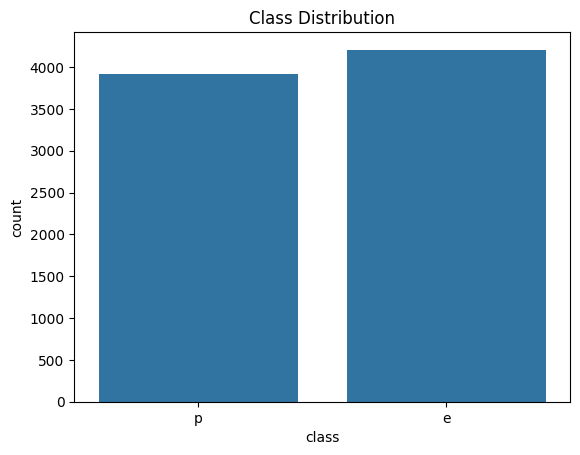

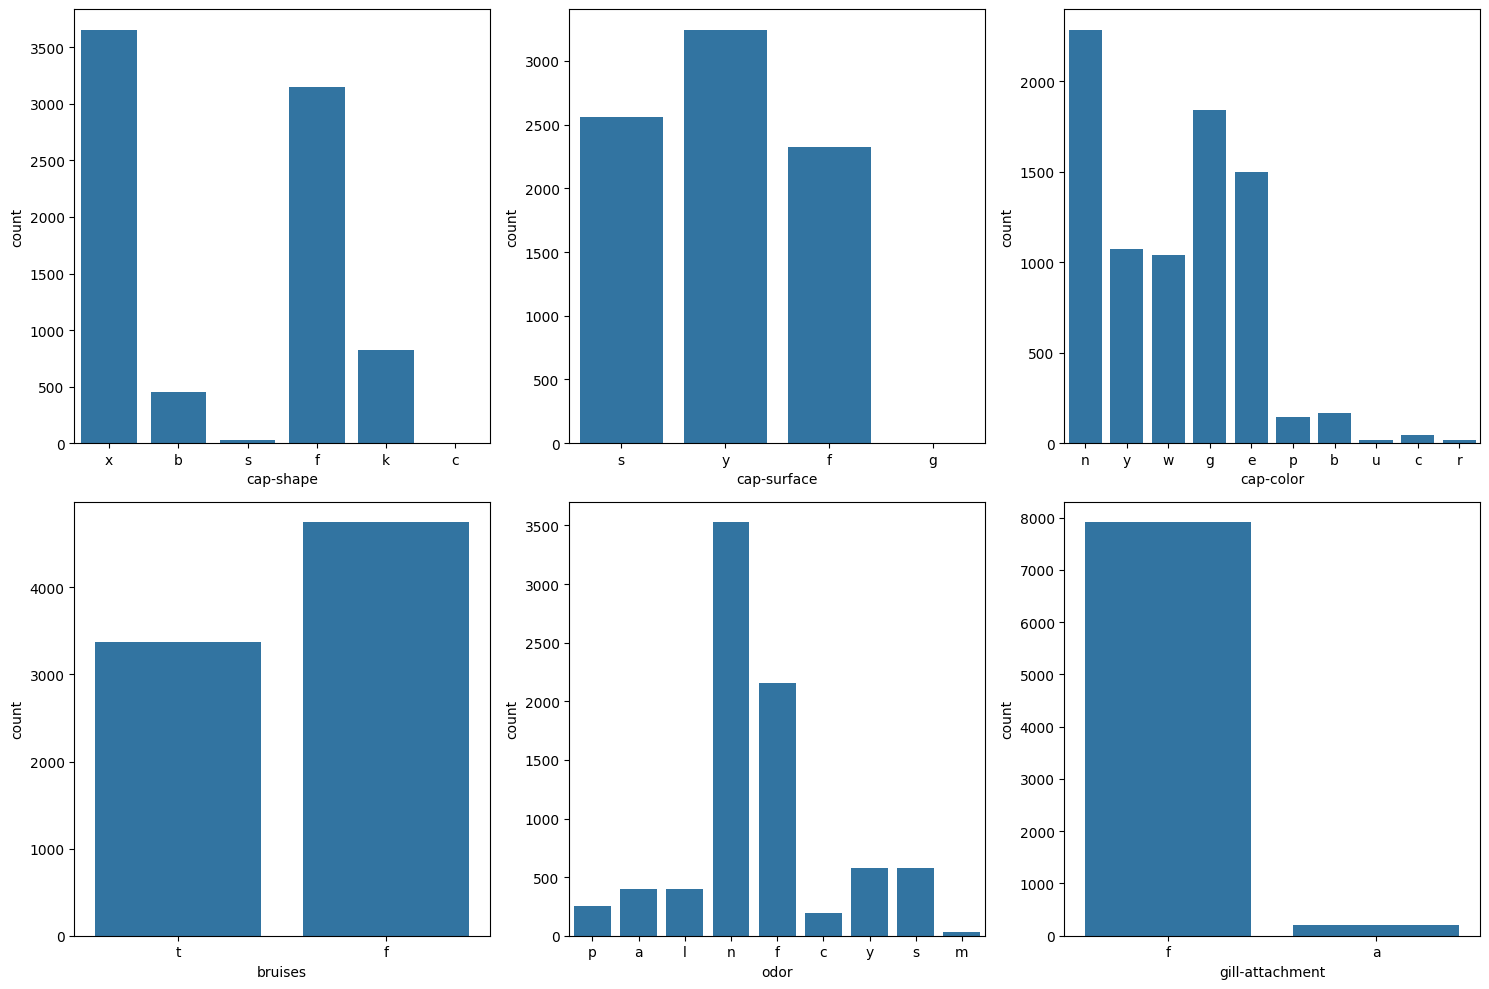

Logistic Regression Accuracy with Noisy Data: 0.8910769230769231
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       841
           1       0.91      0.86      0.88       784

    accuracy                           0.89      1625
   macro avg       0.89      0.89      0.89      1625
weighted avg       0.89      0.89      0.89      1625

SVM Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy with Noisy Data: 0.9723076923076923
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       841
           1       0.97      0.97      0.97       784

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

AdaBoost Accuracy with Noisy Data: 0.8830769230769231
              precision    recall  f1-score   support

           0       0.86      0.92      0.89  

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7374 - loss: 0.5292 - val_accuracy: 0.9046 - val_loss: 0.2411
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9143 - loss: 0.2407 - val_accuracy: 0.9274 - val_loss: 0.2077
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9313 - loss: 0.2057 - val_accuracy: 0.9335 - val_loss: 0.1839
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9341 - loss: 0.1912 - val_accuracy: 0.9415 - val_loss: 0.1704
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9491 - loss: 0.1703 - val_accuracy: 0.9538 - val_loss: 0.1590
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9503 - loss: 0.1691 - val_accuracy: 0.9557 - val_loss: 0.1509
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9556 - loss: 0.1613 - val_accuracy: 0.9637 - val_loss: 0.1485
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.9558 - loss: 0.1665 - val_accuracy

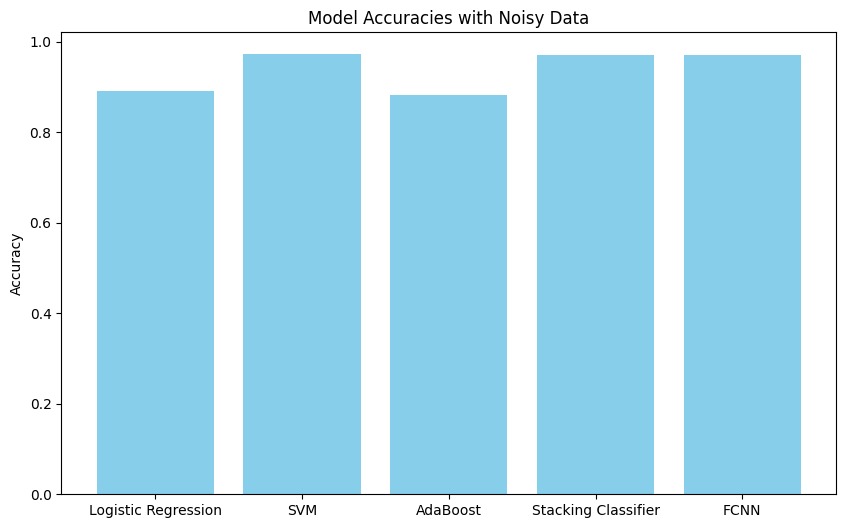

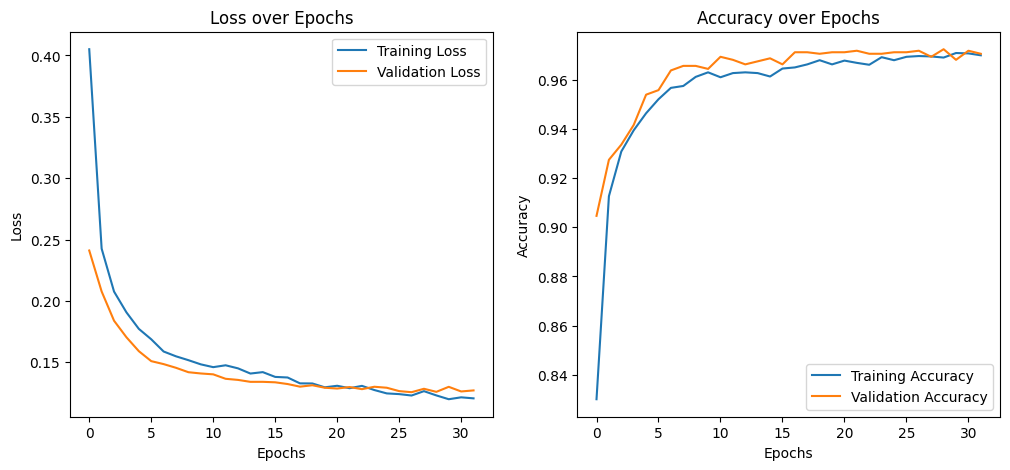

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# Load the dataset
file_path = 'mushrooms.csv'
mushrooms_df = pd.read_csv(file_path)

# Display basic information and statistics of the dataset
print(mushrooms_df.info())
print(mushrooms_df.describe(include='all'))

# Plot class distribution
sns.countplot(x='class', data=mushrooms_df)
plt.title('Class Distribution')
plt.show()

# Plot distribution of some features
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x='cap-shape', data=mushrooms_df, ax=axs[0, 0])
sns.countplot(x='cap-surface', data=mushrooms_df, ax=axs[0, 1])
sns.countplot(x='cap-color', data=mushrooms_df, ax=axs[0, 2])
sns.countplot(x='bruises', data=mushrooms_df, ax=axs[1, 0])
sns.countplot(x='odor', data=mushrooms_df, ax=axs[1, 1])
sns.countplot(x='gill-attachment', data=mushrooms_df, ax=axs[1, 2])
plt.tight_layout()
plt.show()

# Encode categorical variables
label_encoders = {}
for column in mushrooms_df.columns:
    le = LabelEncoder()
    mushrooms_df[column] = le.fit_transform(mushrooms_df[column])
    label_encoders[column] = le

# Separate features and target
X = mushrooms_df.drop('class', axis=1)
y = mushrooms_df['class']

# Introduce noise into the features
def add_noise(data, noise_level=0.02):
    noise = np.random.binomial(1, noise_level, data.shape)
    noisy_data = (data + noise) % 2  # Ensure binary features stay binary
    return noisy_data

X_noisy = add_noise(X)

# Introduce noise into the labels
def add_label_noise(y, noise_level=0.02):
    n_samples = y.shape[0]
    n_noisy = int(n_samples * noise_level)
    noisy_indices = np.random.choice(n_samples, n_noisy, replace=False)
    y_noisy = y.copy()
    y_noisy[noisy_indices] = 1 - y_noisy[noisy_indices]  # Flip the labels
    return y_noisy

y_noisy = add_label_noise(y)

# Split data into training and testing sets
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)

# Initialize variables to track the best model
best_model = None
best_accuracy = 0

# Logistic Regression with L2 regularization
log_reg = LogisticRegression(max_iter=1000, C=0.01)
log_reg.fit(X_train_noisy, y_train_noisy)
log_reg_predictions = log_reg.predict(X_test_noisy)
log_reg_accuracy = accuracy_score(y_test_noisy, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print(classification_report(y_test_noisy, log_reg_predictions))

# SVM with enhanced hyperparameter tuning and regularization
svm = SVC()
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search_svm.fit(X_train_noisy, y_train_noisy)
svm_best_model = grid_search_svm.best_estimator_
svm_predictions = svm_best_model.predict(X_test_noisy)
svm_accuracy = accuracy_score(y_test_noisy, svm_predictions)
print("SVM Best Parameters:", grid_search_svm.best_params_)
print("SVM Accuracy with Noisy Data:", svm_accuracy)
print(classification_report(y_test_noisy, svm_predictions))

# AdaBoost with cross-validation
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.05)
ada.fit(X_train_noisy, y_train_noisy)
ada_predictions = ada.predict(X_test_noisy)
ada_accuracy = accuracy_score(y_test_noisy, ada_predictions)
print("AdaBoost Accuracy", ada_accuracy)
print(classification_report(y_test_noisy, ada_predictions))

ada_scores = cross_val_score(AdaBoostClassifier(), X_noisy, y_noisy, cv=5, n_jobs=1)
print(f"AdaBoost Cross-Validation Scores: {ada_scores}")
print(f"Mean CV Accuracy for AdaBoost: {ada_scores.mean()}")

ada_cm = confusion_matrix(y_test_noisy, ada_predictions)
print(f"Confusion Matrix for AdaBoost:\n{ada_cm}")

# Stacking Ensemble
base_models = [
    ('log_reg', LogisticRegression(max_iter=1000, C=0.01)),
    ('svm', svm_best_model),
    ('ada', AdaBoostClassifier(n_estimators=100, learning_rate=0.05))
]
stacking = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(C=0.01))
stacking.fit(X_train_noisy, y_train_noisy)
stacking_predictions = stacking.predict(X_test_noisy)
stacking_accuracy = accuracy_score(y_test_noisy, stacking_predictions)
print("Stacking Ensemble Accuracy:", stacking_accuracy)
print(classification_report(y_test_noisy, stacking_predictions))

# FCNN (Fully Connected Neural Network) with Dropout and Early Stopping
fcnn_model = Sequential()
fcnn_model.add(Dense(64, input_dim=X_train_noisy.shape[1], activation='relu'))
fcnn_model.add(Dropout(0.5))
fcnn_model.add(Dense(32, activation='relu'))
fcnn_model.add(Dense(1, activation='sigmoid'))

fcnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = fcnn_model.fit(X_train_noisy, y_train_noisy, epochs=50, batch_size=32, validation_data=(X_test_noisy, y_test_noisy), callbacks=[early_stopping])

loss, fcnn_accuracy = fcnn_model.evaluate(X_test_noisy, y_test_noisy)
print("FCNN Accuracy:", fcnn_accuracy)

# Find and save the best model
best_model = max(
    [('Logistic Regression', log_reg, log_reg_accuracy),
     ('SVM', svm_best_model, svm_accuracy),
     ('AdaBoost', ada, ada_accuracy),
     ('Stacking Classifier', stacking, stacking_accuracy),
     ('FCNN', fcnn_model, fcnn_accuracy)],
    key=lambda x: x[2]
)

model_name, model_instance, model_accuracy = best_model
print(f"Best model is {model_name} with accuracy {model_accuracy}")

if model_name == 'FCNN':
    model_instance.save('best_model.keras')
else:
    joblib.dump(model_instance, 'best_model.pkl')

# Plotting the accuracies of different models
accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'SVM': svm_accuracy,
    'AdaBoost': ada_accuracy,
    'Stacking Classifier': stacking_accuracy,
    'FCNN': fcnn_accuracy
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

# Plotting the loss and accuracy over epochs for the FCNN
if 'FCNN' in accuracies.keys():
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.show()
